<a href="https://colab.research.google.com/github/neimali/GRM_used_car_price/blob/main/Grand_Montreal_used_car_price%E2%80%94%E2%80%94EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import datetime
import re
import time

import pandas as pd

In [24]:
from pandas.core.groupby.groupby import T
#Obtain data
df1=pd.read_csv('/content/drive/MyDrive/used_car_data/used_car_data.csv')
df2=pd.read_csv('/content/drive/MyDrive/used_car_data/used_car_data_2.csv')
df3=pd.read_csv('/content/drive/MyDrive/used_car_data/used_car_data_3.csv')
df4=pd.read_csv('/content/drive/MyDrive/used_car_data/used_car_data_4.csv')
df5=pd.read_csv('/content/drive/MyDrive/used_car_data/used_car_data_en.csv')
df6=pd.read_csv('/content/drive/MyDrive/used_car_data/used_car_data_en_2.csv')
df7=pd.read_csv('/content/drive/MyDrive/used_car_data/used_car_data_en_3.csv')
df8=pd.read_csv('/content/drive/MyDrive/used_car_data/used_car_data_en_4.csv')
columns_name = ['index','brand','model','model_year','list_price','color','configration','condition','body_type',\
               'wheel_config','transmission','fuel_type','mileage','carfax_link','dealer_address']
df1.columns=columns_name
df2.columns=columns_name
df3.columns=columns_name
df4.columns=columns_name
df5.columns=columns_name
df6.columns=columns_name
df7.columns=columns_name
df8.columns=columns_name
df1.drop('index',axis=1,inplace=True)
df2.drop('index',axis=1,inplace=True)
df3.drop('index',axis=1,inplace=True)
df4.drop('index',axis=1,inplace=True)
df5.drop('index',axis=1,inplace=True)
df6.drop('index',axis=1,inplace=True)
df7.drop('index',axis=1,inplace=True)
df8.drop('index',axis=1,inplace=True)
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)
df.drop_duplicates(inplace=True,ignore_index=True)

In [25]:
df.head(10)

,brand,model,model_year,list_price,color,configration,condition,body_type,wheel_config,transmission,fuel_type,mileage,carfax_link,dealer_address
0,Scion,tC,2016,"$18,499",Red,Sports Coupe 6-Spd M,Used,Hatchback,Front-wheel drive (FWD),Manual,Other,"81,000",na,"6464 Boul Henri-Bourassa E, Montréal-Nord, QC,..."
1,Mercedes-Benz,Other,2019,"$36,995",Black,A250 4MATIC * APPLE CAR PLAY | CHARGEUR SANS F...,Used,Hatchback,All-wheel drive (AWD),Automatic,Other,"18,300",na,"4844 Boulevard Taschereau, Greenfield Park, QC..."
2,BMW,X1,2018,"$31,995",Black,XDrive28i véhicule d'activités sportives,Used,"SUV, Crossover",4 x 4,Automatic,Gasoline,"66,139",https://www.carproof.com/order?ref=kijiji&vin=...,"6900 Louis-H Lafontaine, Anjou, QC, H1M 2T2"
3,Volvo,XC60,2019,"$44,994",Grey,T6 Momentum AWD,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Other,"25,605",na,"7050 rue Saint Jacques West, Montreal, QC, H4B..."
4,GMC,Terrain,2018,"$23,997",White,SLE Diesel,Used,"SUV, Crossover",Front-wheel drive (FWD),Automatic,Diesel,"119,250",na,"7050 rue Saint Jacques West, Montreal, QC, H4B..."
5,BMW,5-Series,2005,23 500 $,Noir,545i,D'occasion,Berline,Roues motrices arrière,Manuelle,Essence,135 000,na,"Pointe-Claire, QC H9R5E2"
6,Toyota,Other,2020,"$26,000",Grey,.,Used,Hatchback,Front-wheel drive (FWD),Automatic,Hybrid-Electric,"54,912",https://www.carproof.com/order?ref=kijiji&vin=...,"1540 Clair cres., Lachine, QC, H8S 4E6"
7,Audi,Q5,2019,"$43,995",Other,PROGRESSIV CAR PLAY,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,"68,779",na,"2435 boulevard Chomedey, Laval, QC, H7T 2W3"
8,Subaru,Forester,2012,"$6,995",Grey,500,Used,Hatchback,Front-wheel drive (FWD),Automatic,Gasoline,"117,000",https://www.carproof.com/order?ref=kijiji&vin=...,"352 Boulevard du Cure-labelle, Laval, QC, H7V 2X4"
9,Mazda,CX-5,2012,"$4,995",Other,Sport,Used,"SUV, Crossover",4 x 4,Automatic,Gasoline,"230,000",https://www.carproof.com/order?ref=kijiji&vin=...,"352 Boulevard du Cure-labelle, Laval, QC, H7V 2X4"


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           4350 non-null   object
 1   model           4350 non-null   object
 2   model_year      4350 non-null   int64 
 3   list_price      4350 non-null   object
 4   color           4350 non-null   object
 5   configration    4350 non-null   object
 6   condition       4350 non-null   object
 7   body_type       4350 non-null   object
 8   wheel_config    4350 non-null   object
 9   transmission    4350 non-null   object
 10  fuel_type       4350 non-null   object
 11  mileage         4332 non-null   object
 12  carfax_link     4350 non-null   object
 13  dealer_address  4350 non-null   object
dtypes: int64(1), object(13)
memory usage: 475.9+ KB


In [27]:
#data cleaning
#list_price: remove Null value
df.drop(df.loc[df.list_price=='na'].index,inplace=True)
#list_price: covert str->int(remove symbols and decimal)
def price_clean(x):
  x=x.replace('$','')
  x=x.replace('\xa0','')
  x=x.replace(' ','')
  if ',' in x:
    tail=x.split(',')[1]
    if len(tail)==2:
      x=x.split(',')[0]
    else:
      x=x.replace(',','')
  x=x.split('.')[0]

  return int(x)

df.list_price=df.list_price.apply(lambda x : price_clean(x))

#Model: change na->Other/ change Autre->Other
model=df.model.apply(lambda x : x.replace('na','Other'))
model=model.apply(lambda x : x.replace('Autre','Other'))
df.model=model

#Configration: replace all bed value to na ('-', '.', 'Other', '**1,2 ET 3IEME CHANCE & FINANCEMENT MAISON**')
con=df.configration.apply(lambda x : x.replace('-','na'))
con=con.apply(lambda x : x.replace('.','na'))
con=con.apply(lambda x : x.replace('Other','na'))
con=con.apply(lambda x : x.replace('**1,2 ET 3IEME CHANCE & FINANCEMENT MAISON**','na'))
df.configration=con
#Configration: add Model to Configration
df['modelwithconfig']=df[['model','configration']].agg(' ~ '.join, axis=1)

#model_year: convert model_year to car_age
df['car_age']=df.model_year.apply(lambda x : 2022-x)

#remove condition
df.drop('condition',axis=1, inplace=True)

#color: translate French to English
color=df.color.apply(lambda x : x.replace('Noir','Black'))
color=color.apply(lambda x : x.replace('Argent','Silver'))
color=color.apply(lambda x : x.replace('Gris','Grey'))
color=color.apply(lambda x : x.replace('Blanc cassé','Beige'))
color=color.apply(lambda x : x.replace('Blanc','White'))
color=color.apply(lambda x : x.replace('Bleu','Blue'))
color=color.apply(lambda x : x.replace('Violet','Purple'))
color=color.apply(lambda x : x.replace('Rouge','Red'))
color=color.apply(lambda x : x.replace('Autre','Other'))
color=color.apply(lambda x : x.replace('Brun','Brown'))
color=color.apply(lambda x : x.replace('Or','Gold') if x=='Or' else x)
color=color.apply(lambda x : x.replace('Vert','Green'))
color=color.apply(lambda x : x.replace('Jaune','Yellow'))

#color: convert minors color and na to other
color=color.apply(lambda x : x.replace('Bordeaux','Other'))
color=color.apply(lambda x : x.replace('Sarcelle','Other'))
color=color.apply(lambda x : x.replace('na','Other'))
df.color=color

#body_type: translate French to English and simplfy
body=df.body_type.apply(lambda x : x.replace('SUV, Crossover','SUV'))
body=body.apply(lambda x : x.replace('VUS', 'SUV'))
body=body.apply(lambda x : x.replace('Berline', 'Sedan'))
body=body.apply(lambda x : x.replace('Minivan, Van', 'Van'))
body=body.apply(lambda x : x.replace('Fourgonnette, fourgon', 'Van'))
body=body.apply(lambda x : x.replace('Bicorps', 'Hatchback'))
body=body.apply(lambda x : x.replace('Cabriolet', 'Convertible'))
body=body.apply(lambda x : x.replace('Coupé (2 portes)', 'Coupe (2 door)'))
body=body.apply(lambda x : x.replace('Autre', 'Other'))
body=body.apply(lambda x : x.replace('Camionnette', 'Van'))
body=body.apply(lambda x : x.replace('Familiale', 'Wagon'))
df.body_type=body

#wheel_config: translate French to English
wheel=df.wheel_config.apply(lambda x : x.replace('Roues motrices arrière', 'RWD'))
wheel=wheel.apply(lambda x : x.replace('Rear-wheel drive (RWD)','RWD'))
wheel=wheel.apply(lambda x : x.replace('Front-wheel drive (FWD)','FWD'))
wheel=wheel.apply(lambda x : x.replace('Roues motrices avant','FWD'))
wheel=wheel.apply(lambda x : x.replace('4 roues motrices (4x4)','4 x 4'))
wheel=wheel.apply(lambda x : x.replace('Autre','Other'))
wheel=wheel.apply(lambda x : x.replace('na','Other'))
wheel=wheel.apply(lambda x : x.replace('All-wheel drive (AWD)','AWD'))
df.wheel_config=wheel

#transmission: convert bed value to other
tran=df.transmission.apply(lambda x : x.replace('0','other'))
tran=tran.apply(lambda x : x.replace('na','other'))
tran=tran.apply(lambda x : x.replace('Autre','other'))
#transmission: translate French to English
tran=tran.apply(lambda x : x.replace('Automatique','Automatic'))
tran=tran.apply(lambda x : x.replace('Manuelle','Manual'))
df.transmission=tran

#fuel_type: translate French to English
fuel=df.fuel_type.apply(lambda x : x.replace('Essence','Gasoline'))
fuel=fuel.apply(lambda x : x.replace('na','Other'))
fuel=fuel.apply(lambda x : x.replace('Autre','Other'))
fuel=fuel.apply(lambda x : x.replace('Electrique','Electric'))
fuel=fuel.apply(lambda x : x.replace('Véhicule hybride','Hybrid-Electric'))
df.fuel_type=fuel

#mileage: drop nan value
#mileage: convert str->int
def constoi(x):
  try:
    if isinstance(x,str):
      x=x.replace(',','')
      x=x.replace('\xa0','')
      x=int(x)
    elif isinstance(x,float) :
      x=int(str(x).split('.')[0])
  except:
    x=-1
  return x

df.mileage=df.mileage.apply(lambda x : constoi(x))
df.drop(df.loc[df.mileage==-1].index,inplace=True)

#carfax_link: convert to 0/1
df['with_carfax']=df.carfax_link.apply(lambda x : 0 if x=='na' else 1)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4282 entries, 0 to 4349
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            4282 non-null   object
 1   model            4282 non-null   object
 2   model_year       4282 non-null   int64 
 3   list_price       4282 non-null   int64 
 4   color            4282 non-null   object
 5   configration     4282 non-null   object
 6   body_type        4282 non-null   object
 7   wheel_config     4282 non-null   object
 8   transmission     4282 non-null   object
 9   fuel_type        4282 non-null   object
 10  mileage          4282 non-null   int64 
 11  carfax_link      4282 non-null   object
 12  dealer_address   4282 non-null   object
 13  modelwithconfig  4282 non-null   object
 14  car_age          4282 non-null   int64 
 15  with_carfax      4282 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 568.7+ KB


In [29]:
df.head(10)

,brand,model,model_year,list_price,color,configration,body_type,wheel_config,transmission,fuel_type,mileage,carfax_link,dealer_address,modelwithconfig,car_age,with_carfax
0,Scion,tC,2016,18499,Red,Sports Coupe 6naSpd M,Hatchback,FWD,Manual,Other,81000,na,"6464 Boul Henri-Bourassa E, Montréal-Nord, QC,...",tC ~ Sports Coupe 6naSpd M,6,0
1,Mercedes-Benz,Other,2019,36995,Black,A250 4MATIC * APPLE CAR PLAY | CHARGEUR SANS F...,Hatchback,AWD,Automatic,Other,18300,na,"4844 Boulevard Taschereau, Greenfield Park, QC...",Other ~ A250 4MATIC * APPLE CAR PLAY | CHARGEU...,3,0
2,BMW,X1,2018,31995,Black,XDrive28i véhicule d'activités sportives,SUV,4 x 4,Automatic,Gasoline,66139,https://www.carproof.com/order?ref=kijiji&vin=...,"6900 Louis-H Lafontaine, Anjou, QC, H1M 2T2",X1 ~ XDrive28i véhicule d'activités sportives,4,1
3,Volvo,XC60,2019,44994,Grey,T6 Momentum AWD,SUV,AWD,Automatic,Other,25605,na,"7050 rue Saint Jacques West, Montreal, QC, H4B...",XC60 ~ T6 Momentum AWD,3,0
4,GMC,Terrain,2018,23997,White,SLE Diesel,SUV,FWD,Automatic,Diesel,119250,na,"7050 rue Saint Jacques West, Montreal, QC, H4B...",Terrain ~ SLE Diesel,4,0
5,BMW,5-Series,2005,23500,Black,545i,Sedan,RWD,Manual,Gasoline,135000,na,"Pointe-Claire, QC H9R5E2",5-Series ~ 545i,17,0
6,Toyota,Other,2020,26000,Grey,na,Hatchback,FWD,Automatic,Hybrid-Electric,54912,https://www.carproof.com/order?ref=kijiji&vin=...,"1540 Clair cres., Lachine, QC, H8S 4E6",Other ~ na,2,1
7,Audi,Q5,2019,43995,Other,PROGRESSIV CAR PLAY,SUV,AWD,Automatic,Gasoline,68779,na,"2435 boulevard Chomedey, Laval, QC, H7T 2W3",Q5 ~ PROGRESSIV CAR PLAY,3,0
8,Subaru,Forester,2012,6995,Grey,500,Hatchback,FWD,Automatic,Gasoline,117000,https://www.carproof.com/order?ref=kijiji&vin=...,"352 Boulevard du Cure-labelle, Laval, QC, H7V 2X4",Forester ~ 500,10,1
9,Mazda,CX-5,2012,4995,Other,Sport,SUV,4 x 4,Automatic,Gasoline,230000,https://www.carproof.com/order?ref=kijiji&vin=...,"352 Boulevard du Cure-labelle, Laval, QC, H7V 2X4",CX-5 ~ Sport,10,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


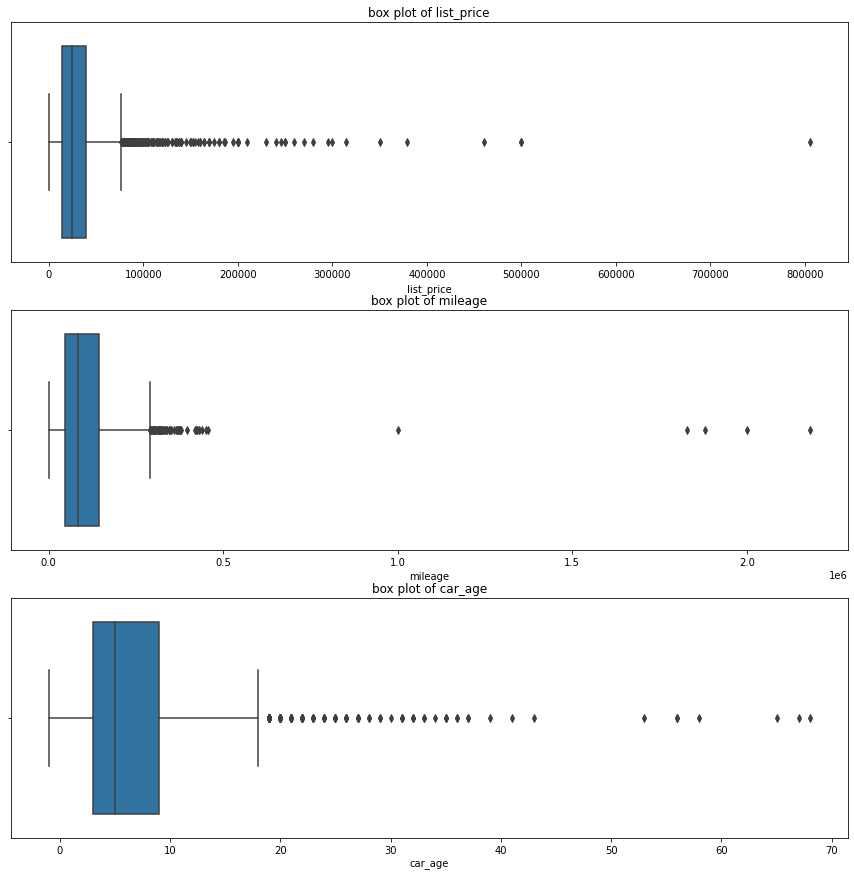

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns

#numerical features 
num_cols=['list_price','mileage','car_age']
fig = plt.figure(figsize=(15,15))
for i,col in enumerate(num_cols):
  ax=fig.add_subplot(len(num_cols),1,i+1)
  sns.boxplot(df[col],ax=ax)
  ax.set(title=col)
  ax.set_title(f'box plot of {col}')

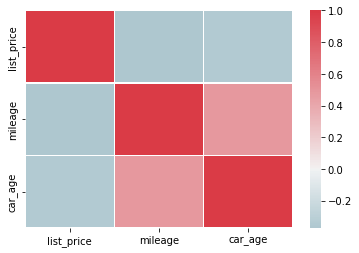

In [31]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[num_cols].corr(),cmap=cmap,vmax=1,center=0,linewidths=.5)

graph for brand : total = 52


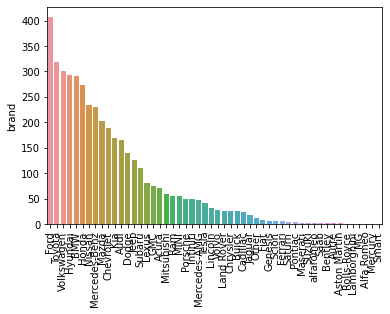

graph for color : total = 14


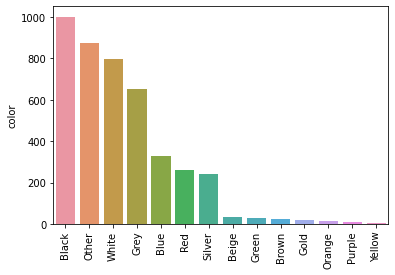

graph for body_type : total = 9


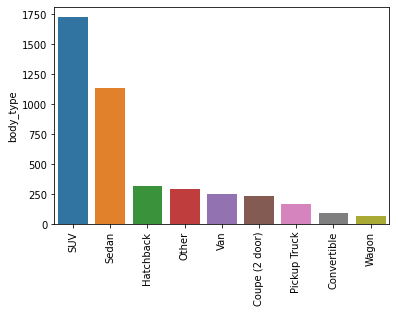

graph for wheel_config : total = 5


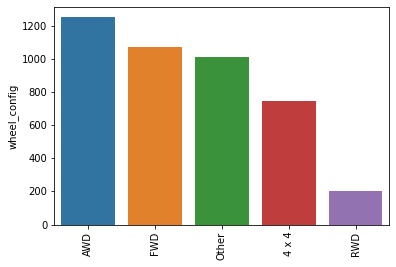

graph for transmission : total = 3


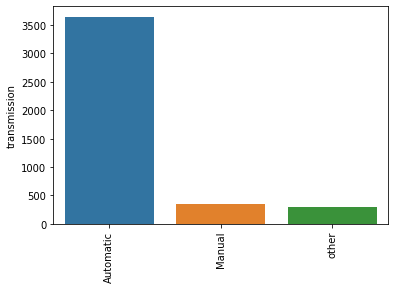

graph for fuel_type : total = 5


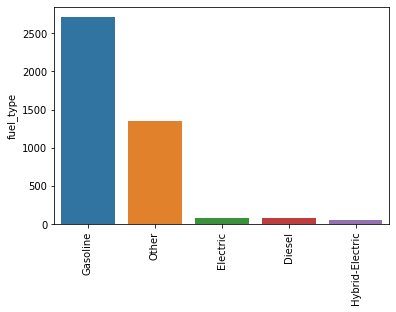

graph for with_carfax : total = 2


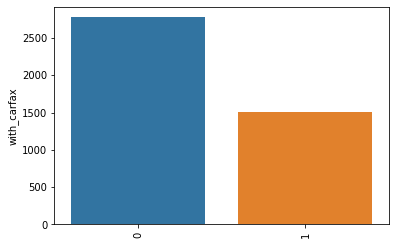

In [35]:
# categorical feature
cat_cols=['brand','color','body_type','wheel_config','transmission','fuel_type','with_carfax']
for i in cat_cols:
  value=df[i].value_counts()
  print("graph for %s : total = %d" % (i, len(value)))
  chart = sns.barplot(x=value.index, y=value)
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
  plt.show()

In [45]:
pd.pivot_table(df,index=['brand','model','configration'],values='list_price').sort_values('list_price',ascending=False)

list_price
brand         model          configration                                                 
Ferrari       Other          GT3 na RACE CAR na NOT STREET LEGAL                  804995.0
Rolls-Royce   Phantom        Drophead Coupe NIGHTHAWK EDITION 1                   499995.0
Ferrari       Other          Coupe Entire Car Clear 3M * NO LUXURY TAX *          499995.0
                             CHALLENGE EVO na RACE CAR na NOT STREET LEGAL        459995.0
Porsche       911            GT3                                                  379000.0
Mercedes-AMG  G-Class        Carbon Widetrack Urban Automotive* NO LUXURY TAX*    349999.0
Mercedes-Benz G-Class        G63 AMG Magno Black 22 inch                          315000.0
                             AMG G 63                                             300000.0
Jaguar        Other          na                                                   295595.0
Porsche       Other          GT3 IPE EXHAUST & TUNE STAGE 2 * NO LUXURY TAX *     279995.0
Bentley       Continental GT GT3R ONE OF 300 CARS WORLDWIDE * NO LUXURY TAX *     269995.0
Mercedes-Benz G-Class        G550 4MATIC G Manufaktur * NO LUXURY TAX *           259990.0
Aston Martin  DB11           V8 Volante                                           249995.0
Ferrari       Other          CPO na 2 Years Ferrari Extended Warranty             249995.0
Mercedes-Benz AMG GT         R Roadster / Carbon Fiber / Driver Assist            245900.0
Ferrari       California     CPO na 2 Years Ferrari Extended Warranty             239995.0
Bentley       Bentayga       W12 Signature                                        229995.0
Porsche       911            Carrera 4S Toit Pano Cuir GPS                        209990.0
Ram           3500           na                                                   200000.0
Porsche       911            Carrera 4S Cabriolet                                 199997.0

In [40]:
pd.pivot_table(df,index='body_type',values='list_price')

,list_price
body_type,
Convertible,48410.365591
Coupe (2 door),47804.232759
Hatchback,23796.582278
Other,28374.683849
Pickup Truck,39439.232143
SUV,33556.974508
Sedan,23558.511033
Van,31818.164000
Wagon,18171.027397


In [41]:
pd.pivot_table(df,index='transmission',values='list_price')

,list_price
transmission,
Automatic,31726.110167
Manual,19545.485294
other,32332.443686


In [42]:
pd.pivot_table(df,index='fuel_type',values='list_price')

,list_price
fuel_type,
Diesel,38462.246753
Electric,60044.428571
Gasoline,28275.835298
Hybrid-Electric,37291.792453
Other,33356.750369


In [43]:
pd.pivot_table(df,index='with_carfax',values='list_price')

,list_price
with_carfax,
0,31145.981635
1,30162.827907


In [46]:
df.to_csv('/content/drive/MyDrive/used_car_data/eda_data.csv')